In [257]:
import pandas as pd
import numpy as np
import os
from collections import Counter

# Data Analysis

In [332]:
data = pd.read_csv("train.csv",engine = 'python')

In [333]:
data.tail()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
1152,BLOG,http://medicalxpress.com/cardiology-news,http://medicalxpress.com/news/2016-04-saxaglip...,4/26/2016,16:30:01,4/27/2016 2:00,"Saxagliptin, sitagliptin don't up hospitalized...",(HealthDay)?Use of saxagliptin or sitagliptin ...,0
1153,YOUTUBE,youtube.com,http://youtube.com/watch?v=3Z9yiPdLDO4,7/20/2016,11:25:11,Ted Rogers Centre for Heart Research,NaN,Description: A keynote address at the Ted Roge...,0
1154,FORUMS,www.cpaptalk.com,http://www.cpaptalk.com/viewtopic.php?t=110350...,2/10/2016,0.471527778,42410.67986,ASV questions and concerns,Quote: : After publishing the first study that...,0
1155,FORUMS,ourfantasycastle.yuku.com,http://ourfantasycastle.yuku.com/reply/554464/...,7/14/2016,5:16:06,NaN,NaN,"Thank you.<br /><br /> What we know,<br /><br ...",1
1156,FORUMS,www.cpaptalk.com,http://www.cpaptalk.com/viewtopic.php?t=111651...,4/24/2016,20:45:00,4/25/2016 6:15,Want to Try Again--Data From First Night,I went through a sleep study (AHI Severe at 95...,0


In [334]:
colum = data.columns
for i in colum:
    print(f'{len(set(data[i]))} different values in the {i} column')
print(f"\ntotal number of examples {len(data)}")

#Host, link, Time(ET), Time(GMT),is of no use for trainig the function

5 different values in the Source column
616 different values in the Host column
1152 different values in the Link column
167 different values in the Date(ET) column
962 different values in the Time(ET) column
968 different values in the time(GMT) column
879 different values in the Title column
1157 different values in the TRANS_CONV_TEXT column
2 different values in the Patient_Tag column

total number of examples 1157


In [335]:
data = data.drop(["Host", "Link", "Date(ET)", "Time(ET)", "time(GMT)"], axis=1)

In [370]:
colum = data.columns
for i in colum:
    print(f'{len(set(data[i]))} different values in the {i} column')
print(f"\ntotal number of examples {len(data)}")



4 different values in the Source column
879 different values in the Title column
1157 different values in the TRANS_CONV_TEXT column
2 different values in the Patient_Tag column

total number of examples 1157


In [371]:
list(set(data["Source"])) # differnet values in "Source" column

[1, 2, 3, 4]

In [372]:
# repalcing FACEBOOK to Facebook 
data.replace(to_replace='FACEBOOK', value='Facebook',inplace=True)
# Now there are only 4 different values in "Source" column

In [373]:
Counter(data.loc[:,"Source"]) #  # distribution of differnet values in "Source" column

Counter({4: 669, 2: 385, 1: 64, 3: 39})

In [374]:
Counter(data.iloc[:,[-1]]['Patient_Tag']) # distribution of labels in the "Patien_Tag" column
# It's an unbalanced data

Counter({0: 917, 1: 240})

In [375]:
dummy = {}
for i in list(set(data["Source"])):
    print(i,"---", Counter(data.iloc[:,[0,-1]][data['Source'] == i]['Patient_Tag']))
# distribution of labels with reference to each values in "Source" column

1 --- Counter({1: 36, 0: 28})
2 --- Counter({0: 375, 1: 10})
3 --- Counter({0: 39})
4 --- Counter({0: 475, 1: 194})


In [376]:
replace_ = {}
for index, i in enumerate(list(set(data["Source"])),start=1):
    replace_[index] = i
    data.replace(to_replace=i, value=index,inplace=True)
data.fillna('UNK',inplace=True)

In [377]:
list(set(data["Source"]))

[1, 2, 3, 4]

In [378]:
data.fillna('UNK',inplace=True)

# Vocab creation

In [379]:
import re

In [380]:
rep_with = ['.', '?', '/', '\n', '(', ')','[', ']', '{', '}', '-','"','!', '|' ]

In [414]:
def rep_(sent):
    for i in rep_with:
        sent = sent.replace(i,' ').replace('$', ' ').replace(',','').replace("'",'')
    return sent

In [415]:
import re
import num2words

def n2w(text):
    return re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), text)

In [416]:
def preprocess(data,pos):
    sent = []
    for i in range(len(data)):
        try:sent.append(n2w(rep_(data.iloc[i,pos])))
        except:print(data.iloc[i,pos])
    return sent

In [417]:
sent = preprocess(data, 2)

In [418]:
sent[0]

'I dont disagree with you in principle  Im just saying that Entresto has been a major failure of Novartis commercial organisation  They  Novartis  were totally exposed at Qone call  With reimbursement issues being resolved the true underlying problem with Entresto was unveiled: Novartis failed to create the demand for the drug  Their disease awareness campaign in the US  the drowning man  was incredibly poor  fear  and panic inducing   What is more they advertised the wrong condition  They were raising awareness of life threatening ACUTE heart failure instead of CHRONIC heart failure for which Entresto is indicated  Entresto has nothing to do with the treatment of acute heart failure  If that was not due to their shocking lack of knowledge of the disease area it can only be explained as a conscious misleading of patients  They managed to alienate medical community advocacy groups and top KOLs including their own principal investigator in Entresto trials who publicly expressed his conce

In [419]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(sent)
# summarize
print("length of vocabulry --",len(vectorizer.vocabulary_))
# print(vectorizer_1.vocabulary_)
# print(vectorizer_2.idf_)

length of vocabulry -- 23389


In [420]:
vector = vectorizer.transform(sent)

# Training

In [421]:
x = np.array(vector.toarray()) # text
m = np.array(data['Source']).reshape(1157,1) # source
x = np.concatenate((m,x),axis=1) # source + text
y = np.array(data.loc[:,'Patient_Tag']) # label

In [422]:
x.shape, y.shape

((1157, 23390), (1157,))

In [423]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [441]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', C=1.5)

model.fit(x_train, y_train)
predictions = model.predict(x_test)
score = model.score(x_test,y_test)
score

0.9181034482758621

In [ ]:
from sklearn import svm
model = svm.SVC(class_weight='balanced', C=1.5)
model.fit(x_train, y_train,)

predictions = model.predict(x_test)
score = model.score(x_test,y_test)
score

In [409]:
import xgboost as xgb

In [410]:
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

In [411]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 100, alpha = 0.75, n_estimators = 100, n_jobs = 32)

In [412]:
xg_reg.fit(x_train,y_train)
predictions = xg_reg.predict(x_test)

[00:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [413]:
score = xg_reg.score(x_test,y_test)
score

0.9103448275862069

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,
                 early_stopping_rounds=10,metrics="merror", as_pandas=True, seed=123)

In [ ]:
cv_results

# Results analysis

In [305]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [306]:
cm = metrics.confusion_matrix(y_test, predictions)

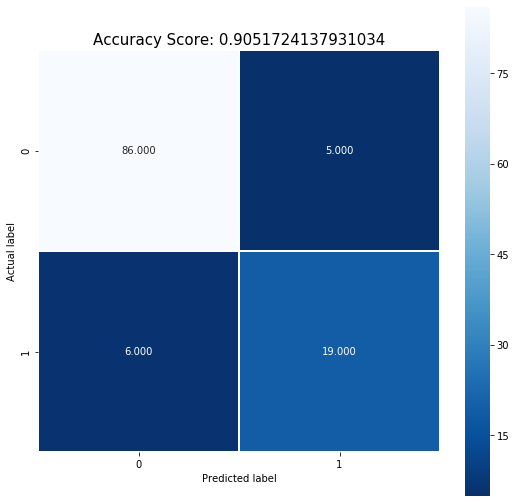

In [307]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Testing

In [430]:
data_ = pd.read_csv("test.csv",engine='python')

In [431]:
data_ = data_.drop(["Host", "Link", "Date(ET)", "Time(ET)", "time(GMT)", "Unnamed: 9", "Index"], axis=1)
data_.replace(to_replace='FACEBOOK', value='Facebook',inplace=True)
replace_ = {}
for index, i in enumerate(list(set(data_["Source"])),start=1):
    replace_[index] = i
    data_.replace(to_replace=i, value=index,inplace=True)
data_.fillna('UNK',inplace=True)

In [432]:
sent = preprocess(data_, 2)

In [433]:
data_.head()

,Source,Title,TRANS_CONV_TEXT
0,2,UNK,"Baby Slice, the son of the late Kimbo Slice, h..."
1,4,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had..."
2,2,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG..."
3,4,UNK,Hello. I suffer from congestive heart failure ...
4,2,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...


In [434]:
vector = vectorizer.transform(sent)

In [435]:
x = np.array(vector.toarray())
m = np.array(data_['Source']).reshape(571,1) # source
x = np.concatenate((m,x),axis=1) # source + text

In [436]:
# predictions = model.predict(x)
predictions = xg_reg.predict(x)

In [437]:
predictions.shape

(571,)

# Saving

In [438]:
format = 'Index,Patient_Tag\n'

In [439]:
for index, i in enumerate(predictions,start=1):
    format+=str(index)+','+str(i) + '\n'

In [440]:
with open("submission_7.csv", "w") as f:
    f.write(format.strip())